<a href="https://colab.research.google.com/github/cristirofer/HSOA/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fase de exploración completada. Mejor ruta inicial: [0, 4, 2, 3, 5, 1] (Distancia: 20)
Iteración 0: Mejor distancia = 20
Iteración 50: Mejor distancia = 20
Iteración 100: Mejor distancia = 20
Iteración 150: Mejor distancia = 20
Iteración 200: Mejor distancia = 20
Iteración 250: Mejor distancia = 20

=== RESULTADOS FINALES ===
Mejor ruta encontrada: [0, 4, 2, 3, 5, 1]
Distancia total: 20


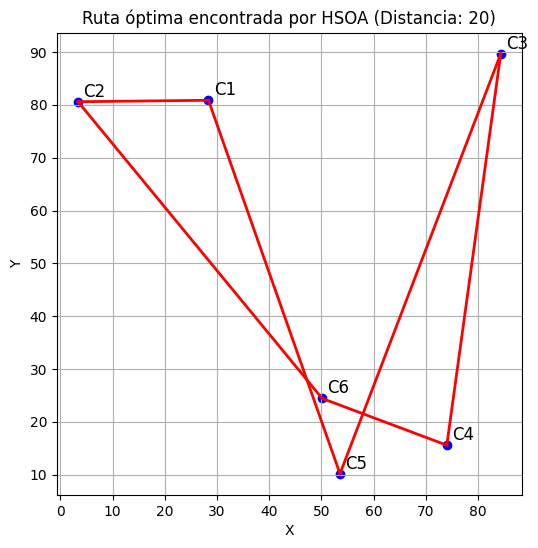

In [ ]:
# ===============================
# 🦈 HAMMERHEAD SHARK OPTIMIZATION ALGORITHM (HSOA)
# Adaptación al Problema del Viajante (TSP)
# Basado en: Ali, Zafar & Bakhshi (2019)
# ===============================

import numpy as np
import random
import math
import matplotlib.pyplot as plt

# ===============================
# Datos del problema (matriz de distancias)
# ===============================
dist_matrix = np.array([
    [0, 2, 9, 10, 5, 7],
    [2, 0, 6, 3, 8, 4],
    [9, 6, 0, 4, 3, 8],
    [10, 3, 4, 0, 7, 2],
    [5, 8, 3, 7, 0, 6],
    [7, 4, 8, 2, 6, 0]
])

n_cities = len(dist_matrix)

# Parámetros del algoritmo
population_size = 20
max_iterations = 300
sonar_count = 30

# ===============================
# Funciones auxiliares
# ===============================

def route_distance(route):
    """Calcula la distancia total de una ruta (ciclo cerrado)."""
    total = 0
    for i in range(len(route) - 1):
        total += dist_matrix[route[i]][route[i + 1]]
    total += dist_matrix[route[-1]][route[0]]  # volver a la ciudad inicial
    return total

def random_route():
    """Genera una ruta aleatoria válida."""
    route = list(range(n_cities))
    random.shuffle(route)
    return route

def swap(route):
    """Intercambia dos ciudades aleatoriamente (movimiento local)."""
    r = route.copy()
    i, j = random.sample(range(len(r)), 2)
    r[i], r[j] = r[j], r[i]
    return r

def local_terrain(route):
    """Promedio de las distancias entre ciudades consecutivas (simula el 'terreno')."""
    return np.mean([dist_matrix[route[i]][route[(i + 1) % n_cities]] for i in range(n_cities)])

# ===============================
# Algoritmo HSOA-TSP
# ===============================
def HSOA_TSP():
    # ---- Fase 1: Exploración (Sonars) ----
    population = [random_route() for _ in range(sonar_count)]
    visited_counts = {tuple(r): 1 for r in population}

    fitness = [route_distance(r) for r in population]
    best_route = population[np.argmin(fitness)]
    best_distance = min(fitness)

    print(f"Fase de exploración completada. Mejor ruta inicial: {best_route} (Distancia: {best_distance})")

    # ---- Fase 2: Construcción / Refinamiento ----
    for iteration in range(max_iterations):
        new_population = []

        for shark in population:
            # Movimiento exploratorio (intercambio local)
            candidate = swap(shark)

            # Calcular R = d * t * v
            d = route_distance(candidate)
            t = local_terrain(candidate)
            v = visited_counts.get(tuple(candidate), 1)
            R_candidate = d * t * v

            # Calcular R de la ruta actual
            d_curr = route_distance(shark)
            t_curr = local_terrain(shark)
            v_curr = visited_counts.get(tuple(shark), 1)
            R_current = d_curr * t_curr * v_curr

            # El tiburón se mueve hacia la ruta con menor R
            if R_candidate < R_current:
                new_population.append(candidate)
                visited_counts[tuple(candidate)] = visited_counts.get(tuple(candidate), 0) + 1
            else:
                new_population.append(shark)
                visited_counts[tuple(shark)] += 1

        # Actualizar mejor ruta global
        fitness = [route_distance(r) for r in new_population]
        current_best_distance = min(fitness)
        current_best_route = new_population[np.argmin(fitness)]

        if current_best_distance < best_distance:
            best_distance = current_best_distance
            best_route = current_best_route

        population = new_population

        # Mostrar progreso
        if iteration % 50 == 0:
            print(f"Iteración {iteration}: Mejor distancia = {best_distance}")

    return best_route, best_distance

# ===============================
# Ejecución principal
# ===============================
best_route, best_distance = HSOA_TSP()

print("\n=== RESULTADOS FINALES ===")
print("Mejor ruta encontrada:", best_route)
print("Distancia total:", best_distance)

# ===============================
# Visualización del resultado
# ===============================
# Crear coordenadas aleatorias para visualizar las ciudades
coords = np.random.rand(n_cities, 2) * 100

plt.figure(figsize=(6, 6))
for i in range(n_cities):
    plt.scatter(coords[i][0], coords[i][1], color='blue')
    plt.text(coords[i][0]+1, coords[i][1]+1, f"C{i+1}", fontsize=12)

# Dibujar la mejor ruta
for i in range(len(best_route)):
    c1, c2 = best_route[i], best_route[(i + 1) % len(best_route)]
    plt.plot([coords[c1][0], coords[c2][0]], [coords[c1][1], coords[c2][1]], 'r-', linewidth=2)

plt.title(f"Ruta óptima encontrada por HSOA (Distancia: {best_distance})")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [1]:
# Celda 1: Importar bibliotecas
import numpy as np
import random
import matplotlib.pyplot as plt
import copy

print("Bibliotecas importadas.")

Bibliotecas importadas.


In [2]:
# Celda 2: Datos del Problema (Matriz de Distancias TSP)
# Según la Práctica 6, Parte 2, "Datos del Problema" [cite: 119-122]
# Ciudades: 1, 2, 3, 4, 5, 6
# (Índices de 0 a 5)

dist_matrix = np.array([
    # 1  2  3   4  5  6
    [ 0, 2, 9, 10, 5, 7],  # Ciudad 1
    [ 2, 0, 6,  3, 8, 4],  # Ciudad 2
    [ 9, 6, 0,  4, 3, 8],  # Ciudad 3
    [10, 3, 4,  0, 7, 2],  # Ciudad 4
    [ 5, 8, 3,  7, 0, 6],  # Ciudad 5
    [ 7, 4, 8,  2, 6, 0]   # Ciudad 6
])

N_CITIES = len(dist_matrix)
print(f"Número de ciudades: {N_CITIES}")
print("Matriz de distancias:")
print(dist_matrix)

Número de ciudades: 6
Matriz de distancias:
[[ 0  2  9 10  5  7]
 [ 2  0  6  3  8  4]
 [ 9  6  0  4  3  8]
 [10  3  4  0  7  2]
 [ 5  8  3  7  0  6]
 [ 7  4  8  2  6  0]]


In [3]:
# Celda 3: Componentes Básicos (Codificación y Evaluación)

## 1. Codificación de Soluciones [cite: 125]
# "Representar una solución como un vector que contenga el orden..."
def crear_ruta_aleatoria():
    """Crea una ruta aleatoria (permutación) de las ciudades."""
    ruta = list(range(N_CITIES))
    random.shuffle(ruta)
    return ruta

## 2. Función de Evaluación [cite: 128]
# "Calcular la distancia total recorrida en la ruta..."
def calcular_distancia_total(ruta):
    """Calcula la distancia total de una ruta (solución)."""
    distancia = 0
    for i in range(N_CITIES):
        ciudad_actual = ruta[i]
        ciudad_siguiente = ruta[0] if i == N_CITIES - 1 else ruta[i+1]
        distancia += dist_matrix[ciudad_actual, ciudad_siguiente]
    return distancia

## 3. Inicializar Población (Enjambre)
def inicializar_poblacion(tamano_poblacion):
    """Crea la población inicial de 'tiburones'."""
    poblacion = []
    for _ in range(tamano_poblacion):
        ruta = crear_ruta_aleatoria()
        distancia = calcular_distancia_total(ruta)
        poblacion.append({"ruta": ruta, "distancia": distancia})
    return poblacion

In [4]:
# Celda 4: Operadores de Búsqueda Inspirados en HSOA

### 1. Operador de "Caza" (Movimiento Dirigido hacia la Presa)
#    Un tiburón imita a la "presa" (mejor solución)
#    Usamos un "Order Crossover" (OX) como operador de cruce.

def operador_caza(ruta_tiburon, ruta_presa):
    """
    Simula la 'caza' cruzando la ruta del tiburón con la de la presa.
    Retorna una nueva ruta hija.
    """
    hijo = [-1] * N_CITIES

    # Tomar un segmento aleatorio de la 'presa'
    inicio, fin = sorted(random.sample(range(N_CITIES), 2))

    # Copiar el segmento de la 'presa' al hijo
    hijo[inicio:fin+1] = ruta_presa[inicio:fin+1]

    # Rellenar el resto con los genes del 'tiburon'
    puntero_tiburon = 0
    puntero_hijo = 0

    while -1 in hijo:
        if puntero_hijo == inicio: # Saltar el segmento copiado
            puntero_hijo = fin + 1

        # Si la ciudad del tiburón no está ya en el hijo
        ciudad_tiburon = ruta_tiburon[puntero_tiburon]
        if ciudad_tiburon not in hijo:
            hijo[puntero_hijo] = ciudad_tiburon
            puntero_hijo += 1

        puntero_tiburon += 1

    return hijo

### 2. Operador de "Exploración" (Sentidos Locales)
#    Simula la exploración sensorial local.
#    Usamos una "mutación por intercambio" (swap).

def operador_exploracion(ruta, prob_mutacion):
    """
    Simula la 'exploración' local mutando la ruta.
    """
    if random.random() < prob_mutacion:
        # Elegir dos índices aleatorios para intercambiar
        idx1, idx2 = random.sample(range(N_CITIES), 2)
        ruta[idx1], ruta[idx2] = ruta[idx2], ruta[idx1]
    return ruta

In [5]:
# Celda 5: Algoritmo Principal HSOA-TSP

def ejecutar_hsoa_tsp(tamano_poblacion, num_iteraciones, prob_mutacion):

    # 1. Inicializar el enjambre de tiburones
    poblacion = inicializar_poblacion(tamano_poblacion)

    # 2. Encontrar la "Presa" inicial (mejor solución)
    presa_global = min(poblacion, key=lambda x: x["distancia"])
    # Hacemos una copia profunda para evitar que se modifique
    presa_global = copy.deepcopy(presa_global)

    historial_mejores = [presa_global["distancia"]]
    print(f"Iteración 0 (Presa inicial): Distancia = {presa_global['distancia']}")

    # 3. Iniciar el bucle de "caza" (iteraciones)
    for iter in range(num_iteraciones):

        # 4. Simular el comportamiento de cada tiburón [cite: 135]
        for tiburon in poblacion:

            # 4.1. "Caza": Moverse hacia la presa (Crossover)
            ruta_caza = operador_caza(tiburon["ruta"], presa_global["ruta"])

            # 4.2. "Exploración": Usar sentidos locales (Mutación)
            ruta_explorada = operador_exploracion(ruta_caza, prob_mutacion)

            # 4.3. Evaluar la nueva posición
            dist_nueva = calcular_distancia_total(ruta_explorada)

            # 4.4. Selección: El tiburón se mueve si la nueva posición es mejor
            if dist_nueva < tiburon["distancia"]:
                tiburon["ruta"] = ruta_explorada
                tiburon["distancia"] = dist_nueva

        # 5. Actualizar la "Presa"
        # Encontrar el tiburón con la mejor posición en la población actual
        mejor_tiburon_actual = min(poblacion, key=lambda x: x["distancia"])

        # Si este tiburón es mejor que la presa global, actualizamos la presa
        if mejor_tiburon_actual["distancia"] < presa_global["distancia"]:
            presa_global = copy.deepcopy(mejor_tiburon_actual)
            print(f"¡Nueva Presa encontrada en iteración {iter + 1}! Distancia = {presa_global['distancia']}")

        historial_mejores.append(presa_global["distancia"])

    print("\n--- Búsqueda HSOA finalizada ---")
    return presa_global, historial_mejores

Iteración 0 (Presa inicial): Distancia = 20

--- Búsqueda HSOA finalizada ---

--- RESULTADOS ---
Mejor ruta encontrada: [4, 0, 1, 5, 3, 2]
Ciudades (en orden): [5, 1, 2, 6, 4, 3]
Distancia total: 20


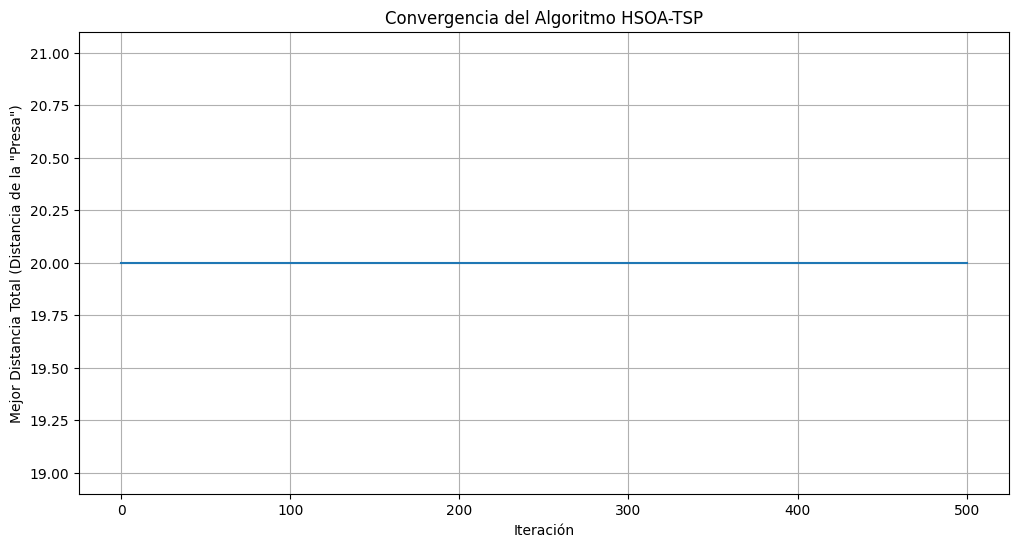

In [6]:
# Celda 6: Ejecución y Resultados [cite: 137-144]

# Parámetros del algoritmo
TAMANO_POBLACION = 30
NUM_ITERACIONES = 500
PROBABILIDAD_MUTACION = 0.1 # Probabilidad de exploración local

# Ejecutar el algoritmo
mejor_solucion, historial = ejecutar_hsoa_tsp(
    TAMANO_POBLACION,
    NUM_ITERACIONES,
    PROBABILIDAD_MUTACION
)

## 1. Resultados de la Ejecución [cite: 138]
print("\n--- RESULTADOS ---")
print(f"Mejor ruta encontrada: {mejor_solucion['ruta']}")
# Sumamos 1 a los índices para que coincidan con los nombres de las ciudades (1 a 6)
print(f"Ciudades (en orden): {[c+1 for c in mejor_solucion['ruta']]}")
print(f"Distancia total: {mejor_solucion['distancia']}")

## 2. Análisis de Resultados (Gráfico de convergencia) [cite: 140, 143]
plt.figure(figsize=(12, 6))
plt.plot(historial)
plt.title('Convergencia del Algoritmo HSOA-TSP')
plt.xlabel('Iteración')
plt.ylabel('Mejor Distancia Total (Distancia de la "Presa")')
plt.grid(True)
plt.show()